## Problem 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
red_wine = pd.read_csv("winequality-red.csv", delimiter = ";")
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print("The features describing the quality of the wines are:")
for col in red_wine.columns[:11]:
    print(col)

The features describing the quality of the wines are:
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [4]:
print(red_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


We can see that all features are numerical.

In [5]:
print(red_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are no missing values and all the features are complete

In [6]:
print(red_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [7]:
for col in red_wine.columns:
    print(col, "range:", red_wine[col].min(), " - ", red_wine[col].max())

fixed acidity range: 4.6  -  15.9
volatile acidity range: 0.12  -  1.58
citric acid range: 0.0  -  1.0
residual sugar range: 0.9  -  15.5
chlorides range: 0.012  -  0.611
free sulfur dioxide range: 1.0  -  72.0
total sulfur dioxide range: 6.0  -  289.0
density range: 0.99007  -  1.00369
pH range: 2.74  -  4.01
sulphates range: 0.33  -  2.0
alcohol range: 8.4  -  14.9
quality range: 3  -  8


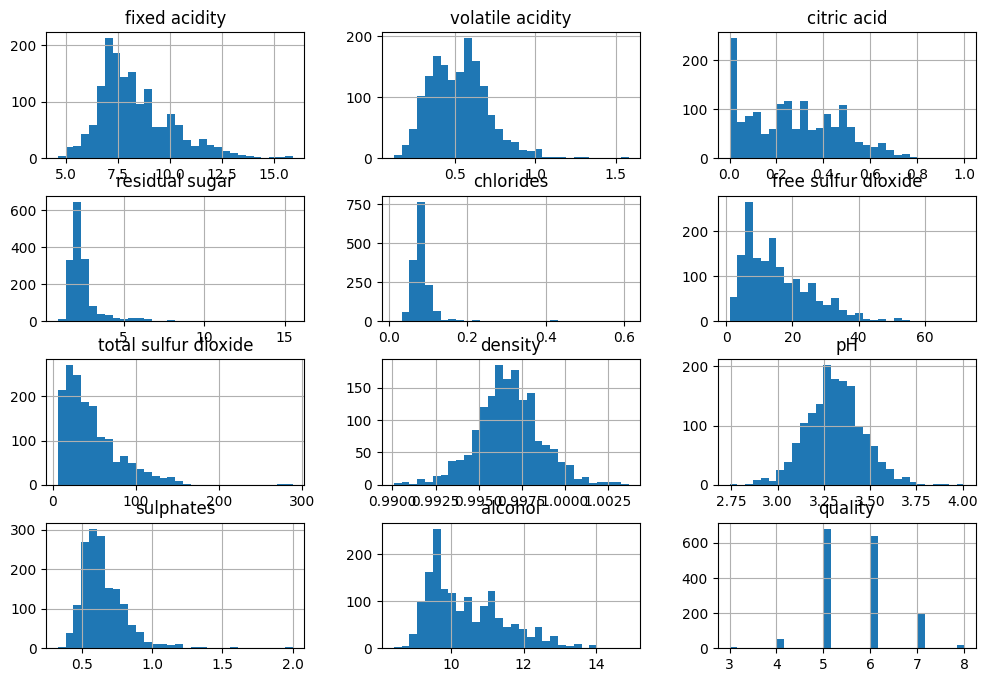

In [8]:
red_wine.hist(bins = 30, figsize=(12, 8))
plt.show()

We can see from the histograms, that the only attribute that has a very different scale is total sulfur dioxide. All attributes except pH and density are right skewed. A way to improve their distributions would be to use a log transformation.

In [9]:
corr_matrix = red_wine.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


The features that affect quality the most are alcohol (positively) and volatile acidity (negatively), while the features that affect it the least are residual sugar, free sulfur dioxide and pH.

In [10]:
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [11]:
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_tr_sc, y_train)

predictions = model.predict(X_te_sc)

In [13]:
R_square_err = model.score(X_te_sc, y_test)
print("R^2 score:", R_square_err)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

R^2 score: 0.3702504549078959
Mean Absolute Error: 0.495119032170256
Mean Squared Error: 0.40636065372564334


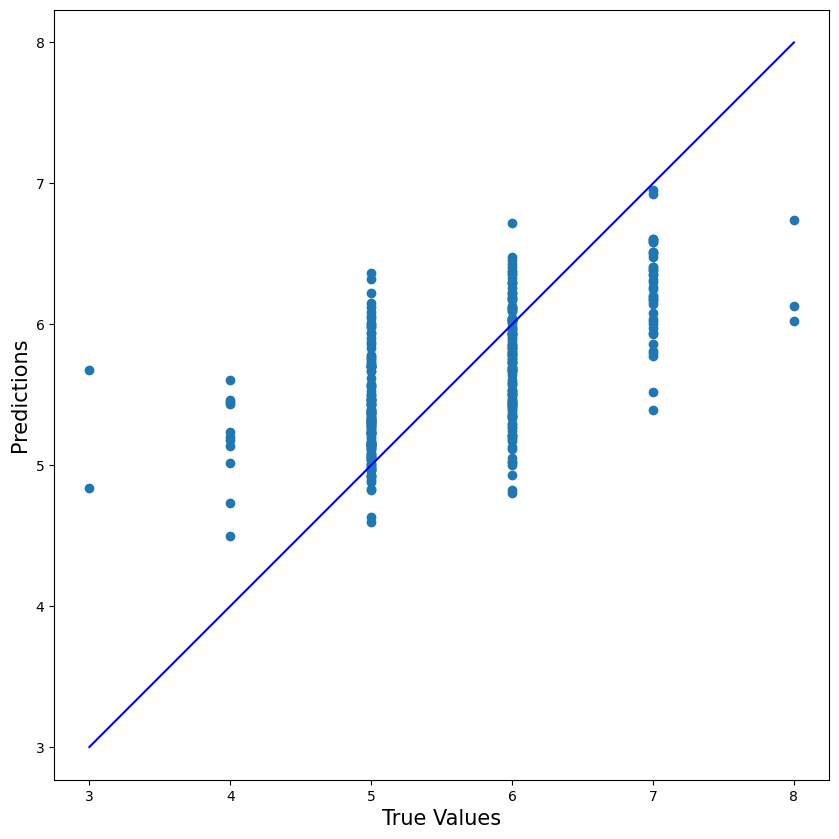

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

We can see that the predictions of the Linear Regression model show a lot of noise, especially in the lower (3-4) and higher (7-8) values. At median values (5-6) the model seems to predict better.
This may suggest that our model is too simple and it cannot capture the relationships between the features.

In [15]:
reg_rmses = cross_val_score(model, X_train, y_train, scoring = 'r2', cv=10)
print(reg_rmses)

[0.2005224  0.34425156 0.39231901 0.38793628 0.31182482 0.36926886
 0.44813168 0.32718276 0.37538268 0.22549275]


In [16]:
mean_score = np.mean(reg_rmses)
std_score = np.std(reg_rmses)
print(mean_score, std_score)

0.3382312806215474 0.07235126326946262


In [17]:
min_R2 = mean_score - std_score
max_R2 = mean_score + std_score
if min_R2 <= R_square_err <= max_R2:
    print("The model's R^2 score is within the limits defined by the 10-fold cross validation.")
else:
    print("The model's R^2 score is not within the limits defined by the 10-fold cross validation.")

The model's R^2 score is within the limits defined by the 10-fold cross validation.


Now we are going to use the same dataset but we will drop the attributes that affect quality the least and use log transformations for the skewed attributes.

In [18]:
red_wine2 = red_wine.drop(["residual sugar", "free sulfur dioxide", "pH"], axis =1)

In [19]:
not_skewed_attr = ["quality", "density"]
skewed_attr = [attr for attr in red_wine2.columns if attr not in not_skewed_attr]
skewed_attr

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'sulphates',
 'alcohol']

In [20]:
for attr in skewed_attr:
    red_wine2[attr] = np.log1p(red_wine2[attr])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

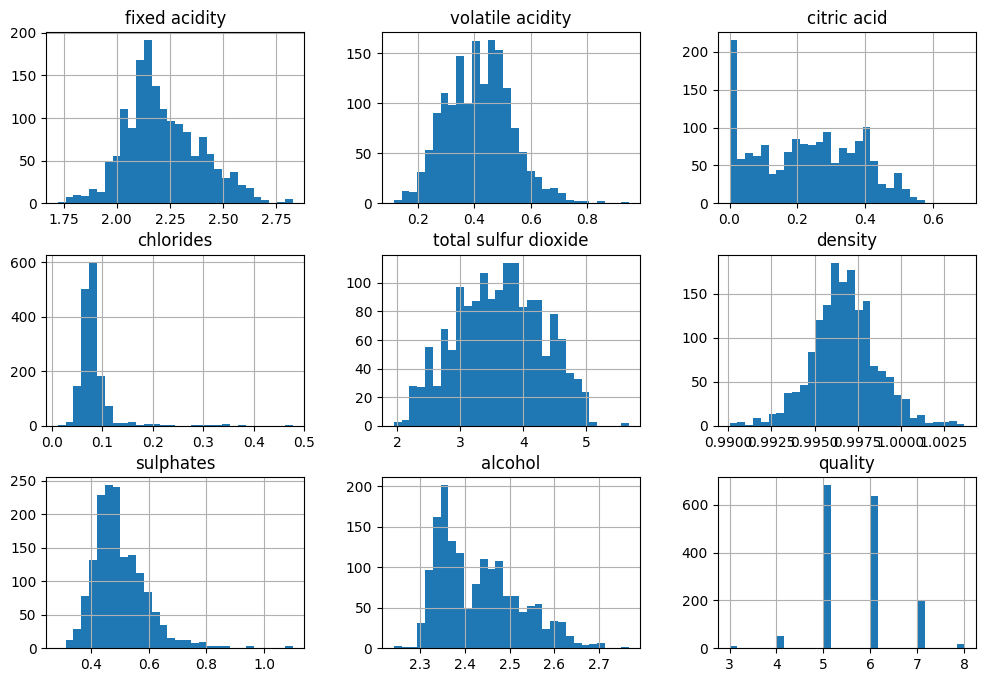

In [21]:
red_wine2.hist(bins = 30, figsize=(12, 8))

Some of the attributes (e.g. fixed acidity) have a slightly better distribution now.

In [22]:
X = red_wine2.drop('quality', axis = 1)
y = red_wine2['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [23]:
scaler2 = StandardScaler()
X_tr_sc = scaler2.fit_transform(X_train)
X_te_sc = scaler2.transform(X_test)

In [24]:
model2 = LinearRegression()
model2.fit(X_tr_sc, y_train)

predictions = model2.predict(X_te_sc)

In [25]:
R_square_score = model2.score(X_te_sc, y_test)
print("R^2 score:", R_square_err)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

R^2 score: 0.3702504549078959
Mean Absolute Error (MAE): 0.49044374525442425
Mean Squared Error: 0.40022628092615414


We have a larger R^2 score which indicates that the model has improved its ability to capture the patterns in the data. Also, both errors are slightly smaller which shows that the R^2 improvement is not due to overfit.

In [26]:
reg_rmses = cross_val_score(model2, X_train, y_train, scoring = 'r2', cv=10)
print(reg_rmses)

[0.24426491 0.3245509  0.37389642 0.40415188 0.29241929 0.36443982
 0.44173242 0.35777114 0.39114172 0.21491717]


In [27]:
mean_score = np.mean(reg_rmses)
std_score = np.std(reg_rmses)
print(mean_score, std_score)

0.3409285675942281 0.06815233463447289


The increase in the mean R^2 score means that the model's predictive ability has improved, while the reduction in the standard deviation means that the model generalizes better on new data.

In [28]:
min_R2 = mean_score - std_score
max_R2 = mean_score + std_score
if min_R2 <= R_square_err <= max_R2:
    print("The model's R^2 score is within the limits defined by the 10-fold cross validation.")
else:
    print("The model's R^2 score is not within the limits defined by the 10-fold cross validation.")

The model's R^2 score is within the limits defined by the 10-fold cross validation.


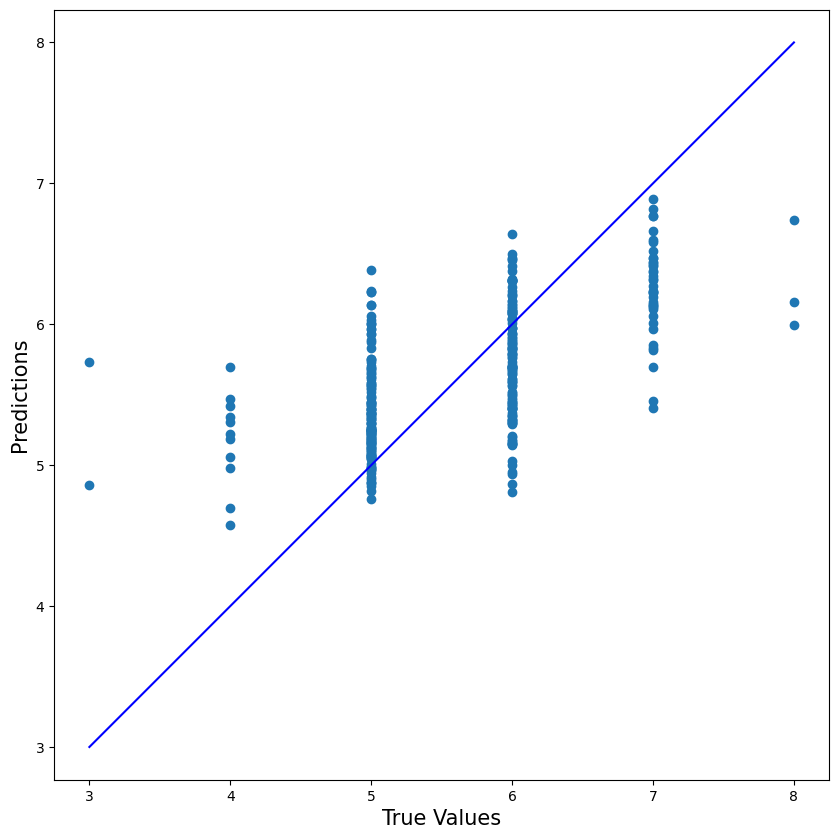

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The plot of the model doesn't show any visual improvements and the model is still too simple. Another problem might be that we use a regression model for a classification problem.